## Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re


## Read Data from CSV

In [2]:
data = pd.read_csv('Desktop/Sample-click-log.csv',encoding='unicode_escape')
data.head()

,transaction_id,affiliate_id,offer_id,datetime,ip,user_agent,country_code,device_model,device_os,device_os_version,ios_ifa,google_aid
0,10227496c1e02a47413a940a54f71d,5087,32394,9/10/17 2:33,174.209.24.165,Mozilla/5.0 (iPhone; CPU IPhone OS 10_3_3 Like...,US,iPhone,iOS,10.3,NaN,NaN
1,102c9a956cc809df1e11c572f254bc,5087,32394,9/10/17 2:33,107.77.89.33,Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like...,US,iPhone,iOS,10.2,NaN,NaN
2,1020255a5a856d72f0593359c7c56f,5087,32394,9/10/17 2:34,66.87.148.50,Mozilla/5.0 (iPhone; CPU IPhone OS 10_3_3 Like...,US,iPhone,iOS,10.3,NaN,NaN
3,102771c8d145a4168e2eac1215124b,5087,32394,9/10/17 2:34,172.58.224.168,Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like...,US,iPhone,iOS,10.2,E2B52269-2D47-411B-B7F2-3655402CB07C,NaN
4,102a5e3bcdeecfed07154f605c5981,5087,32394,9/10/17 2:34,97.46.129.38,Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like...,US,iPhone,iOS,10.2,NaN,NaN


## Check the columns in the dataframe

In [5]:
data.columns

Index(['transaction_id', 'affiliate_id', 'offer_id', 'datetime', 'ip',
       'user_agent', 'country_code', 'device_model', 'device_os',
       'device_os_version', 'ios_ifa', 'google_aid'],
      dtype='object')

## Questions 1(a)
For every affiliate_id(Col B), calculate the unique ios_ifa(Col K) & google_aid(Col L) present in the data.

In [6]:
print ('Answer 1(a)')
aff_level_unique_device_df = data.groupby('affiliate_id')['google_aid','ios_ifa'].nunique()
print (aff_level_unique_device_df)

Answer 1(a)
              google_aid  ios_ifa
affiliate_id                     
1914                  19        0
2882                  22      189
4575                   0        0
5087                 207     7534
5281                  17        7
6102               46188        0
6380                   0        1
6489                   3        2
6507                   1        0
6651                 178        0


In [7]:
aff_level_unique_device_df.columns

Index(['google_aid', 'ios_ifa'], dtype='object')

In [8]:
aff_level_unique_device_df= aff_level_unique_device_df.reset_index()

In [9]:
aff_level_unique_device_df.head()

,affiliate_id,google_aid,ios_ifa
0,1914,19,0
1,2882,22,189
2,4575,0,0
3,5087,207,7534
4,5281,17,7


## Question 1(b)
Calculate how many valid google_aid & ios_ifa exist in the dataset.

In [10]:
data['google_aid'].value_counts()

{tp_aaid}                                                       185
Musi - Unlimited Free Music From YouTube (FREE App Download)     71
b6066183a9cb4b8eb68ac6ea03ff8944                                 43
undefined                                                        25
Musi - Unlimited Music For YouTube                               22
$IDFA                                                            22
[idfa]                                                           16
00000000-0000-0000-0000-000000000000                             13
{gaid}                                                           10
hk41qyp2-aq9b-gq5u-e931-p7353eddxfvf                              7
aff_sub3                                                          7
idfa                                                              6
[gaid]                                                            6
36aab253-20f2-4434-bb06-e39cc09b96d3                              4
1DAE8CB5-C874-40C3-B7EE-D050D72711CF            

In [11]:
data['google_aid'].isnull().values.any()

True

## Method for checking Valid IDs

In [12]:
def valid_google_aid(device_id):
    if(device_id != device_id):
        return False
    regex = re.compile('^[a-f0-9]{8}-?[a-f0-9]{4}-?4[a-f0-9]{3}-?[89ab][a-f0-9]{3}-?[a-f0-9]{12}\Z', re.I)
    match = regex.match(device_id)
    return bool(match)


def valid_ios_ifa(device_id):
    if(device_id != device_id):
        return False
    regex = re.compile('^[A-F0-9]{8}-?[A-F0-9]{4}-?4[A-F0-9]{3}-?[89AB][A-F0-9]{3}-?[A-F0-9]{12}\Z', re.I)
    match = regex.match(device_id)
    return bool(match)

In [13]:
# Checking if google_aid has NAN or Null
data['google_aid'].isnull().values.any()

True

In [14]:
# Checking if ios_ifa has NAN or Null
data['ios_ifa'].isnull().values.any()

True

In [15]:
data['valid_google_aid'] = data['google_aid'].apply(valid_google_aid)

In [16]:
data['valid_ios_ifa'] = data['ios_ifa'].apply(valid_ios_ifa)

In [17]:
data.head()

,transaction_id,affiliate_id,offer_id,datetime,ip,user_agent,country_code,device_model,device_os,device_os_version,ios_ifa,google_aid,valid_google_aid,valid_ios_ifa
0,10227496c1e02a47413a940a54f71d,5087,32394,9/10/17 2:33,174.209.24.165,Mozilla/5.0 (iPhone; CPU IPhone OS 10_3_3 Like...,US,iPhone,iOS,10.3,NaN,NaN,False,False
1,102c9a956cc809df1e11c572f254bc,5087,32394,9/10/17 2:33,107.77.89.33,Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like...,US,iPhone,iOS,10.2,NaN,NaN,False,False
2,1020255a5a856d72f0593359c7c56f,5087,32394,9/10/17 2:34,66.87.148.50,Mozilla/5.0 (iPhone; CPU IPhone OS 10_3_3 Like...,US,iPhone,iOS,10.3,NaN,NaN,False,False
3,102771c8d145a4168e2eac1215124b,5087,32394,9/10/17 2:34,172.58.224.168,Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like...,US,iPhone,iOS,10.2,E2B52269-2D47-411B-B7F2-3655402CB07C,NaN,False,True
4,102a5e3bcdeecfed07154f605c5981,5087,32394,9/10/17 2:34,97.46.129.38,Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like...,US,iPhone,iOS,10.2,NaN,NaN,False,False


## Valid IOS_IFA

In [18]:
data[data['valid_ios_ifa']==True].shape[0]

8072

## Valid Google AID

In [19]:
data[data['valid_google_aid']==True].shape[0]

46661

## Valid Device ID at affiliate id level

In [20]:
aff_level_unique_valid_device_df = data.groupby('affiliate_id')['valid_google_aid','valid_ios_ifa'].sum()
aff_level_unique_valid_device_df

,valid_google_aid,valid_ios_ifa
affiliate_id,,
1914,19.0,0.0
2882,12.0,179.0
4575,0.0,0.0
5087,191.0,7882.0
5281,17.0,8.0
6102,46240.0,0.0
6380,0.0,1.0
6489,3.0,2.0
6507,1.0,0.0


## Question 2(a)
Plot a histogram from the data obtained from exercise 1.a)

In [21]:
aff_level_unique_device_df.head()

,affiliate_id,google_aid,ios_ifa
0,1914,19,0
1,2882,22,189
2,4575,0,0
3,5087,207,7534
4,5281,17,7


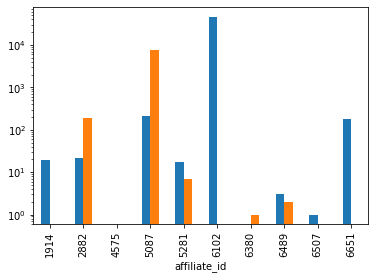

In [22]:
aff_level_unique_device_df.plot(x='affiliate_id', y=['google_aid','ios_ifa'], kind='bar', legend=False)

# Scaling this because some values are very small 
plt.yscale("log")
plt.show()

## Question 2(b)
2.2) Plot a histogram of the no. of clicks v/s affiliate_id in the dataset.

In [23]:
data.head(2)

,transaction_id,affiliate_id,offer_id,datetime,ip,user_agent,country_code,device_model,device_os,device_os_version,ios_ifa,google_aid,valid_google_aid,valid_ios_ifa
0,10227496c1e02a47413a940a54f71d,5087,32394,9/10/17 2:33,174.209.24.165,Mozilla/5.0 (iPhone; CPU IPhone OS 10_3_3 Like...,US,iPhone,iOS,10.3,NaN,NaN,False,False
1,102c9a956cc809df1e11c572f254bc,5087,32394,9/10/17 2:33,107.77.89.33,Mozilla/5.0 (iPhone; CPU IPhone OS 10_2_1 Like...,US,iPhone,iOS,10.2,NaN,NaN,False,False


In [24]:
affiliate_vise_clicks = data[['affiliate_id']].groupby('affiliate_id').size().rename('Clicks').reset_index()


In [25]:
affiliate_vise_clicks.columns

Index(['affiliate_id', 'Clicks'], dtype='object')

Answer 2(b)


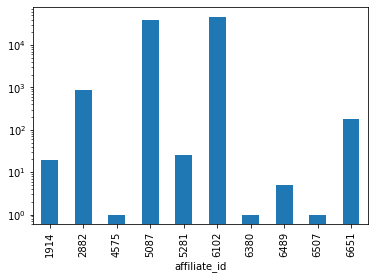

In [26]:
print('Answer 2(b)')

affiliate_vise_clicks.plot(x='affiliate_id', y=['Clicks'], kind='bar', legend=False)

# Scaling this because some values are very small 
plt.yscale("log")
plt.show()